# Stars Assignemnt 2 by Lewis Picker

First steps creat a HR diagram and also plot the central Temperature against central density


In [2]:
#import and define solar constants 
import mesa_reader as mr
import matplotlib.pyplot as plt
import numpy as np

rsol = 6.957e10 #CGS
msol = 1.989e33 #CGS
lsol = 3.8e33   #CGS

In [3]:
# Load in data
#Simple inlist was use wtih mostl default setting for MESA r15140
#loading the 15Msol at solar metalicity (0.014)
pwd = '/home/lewis/Documents/Honours/Stellar/Assignment_2/Models/'
h = mr.MesaData(pwd + '15M_1Zsun/history.data')

In [4]:
#define a function that ruturns the index of an array (a) that has a value closest to a0
#this will be useful when finding ignition and depletion points. 
def find_nearest(a, a0):
    idx = np.abs(a - a0).argmin() #create a difference array and find the minimum value. Easy
    return idx
#quick check 
tmp = find_nearest(h.total_mass_h1, h.total_mass_h1[0]*0.99)
print(h.total_mass_h1[tmp],tmp)
#as expected 

10.66864009278757 876


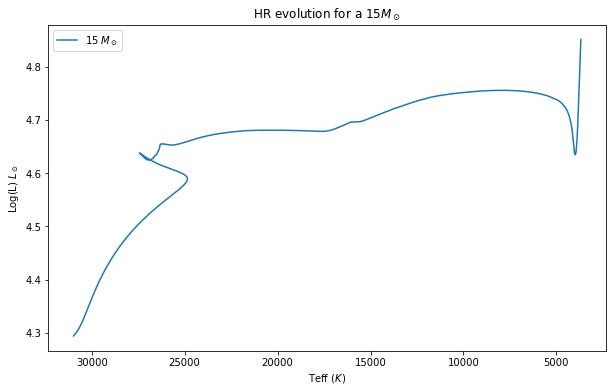

In [11]:
#plot HR evolution of the star
#we want the plots to start at ZAMS and not include the colapse of the cloud (which is where MESA starts)
#do do this start when Xh = 0.99Xh_i (start when 1% of the initial hydrogen is burnt)
l = h.luminosity
Teff = h.effective_T
total_mass_h1 = h.total_mass_h1

idx = find_nearest(h.total_mass_h1, h.total_mass_h1[0]*0.99)

plt.figure(figsize = (10,6))
plt.plot(Teff[idx:], np.log10(l[idx:]),label = '15 $M_\odot$')#start plotting at idx (ZAMS definition)
plt.legend()
plt.title('HR evolution for a 15$M_\odot$')
plt.gca().invert_xaxis() #invert xaxis for traditional HR diagram 
plt.xlabel('Teff $(K)$')
plt.ylabel('Log(L) $L_\odot$')

plt.show()

#below is a HR evolution for a 15Msol 1Zsol MESA Model from ZAMS to end of He burning.  

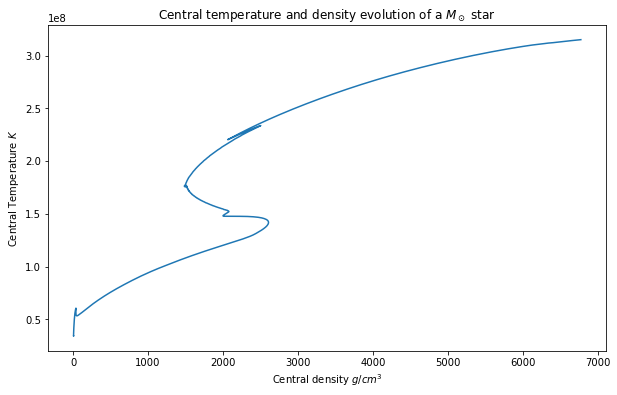

In [13]:
#plot central density and temperature evolution

center_T = h.center_T
center_Rho = h.center_Rho
# center_P = h.center_P

plt.figure(figsize = (10,6))
plt.plot(center_Rho[idx:], center_T[idx:], label = '15 $M_\odot$')
plt.xlabel('Central density $g/cm^3$')
plt.ylabel('Central Temperature $K$')
plt.title('Central temperature and density evolution of a $M_\odot$ star')
plt.show()



Studying stellar evolution with mesa \
part a)

1708
734 853 1539 1665
2110
796 913 1572 2075
2113
836 953 1564 2079
2207
866 984 1629 2178
1718
884 1002 1267 1688
1706
901 1021 1240 1675
2190
911 1031 2018 2161
2033
909 1033 1818 2003
2079
927 1253 1532 2054
2520
933 1486 2120 2494
2358
925 1056 1996 2330


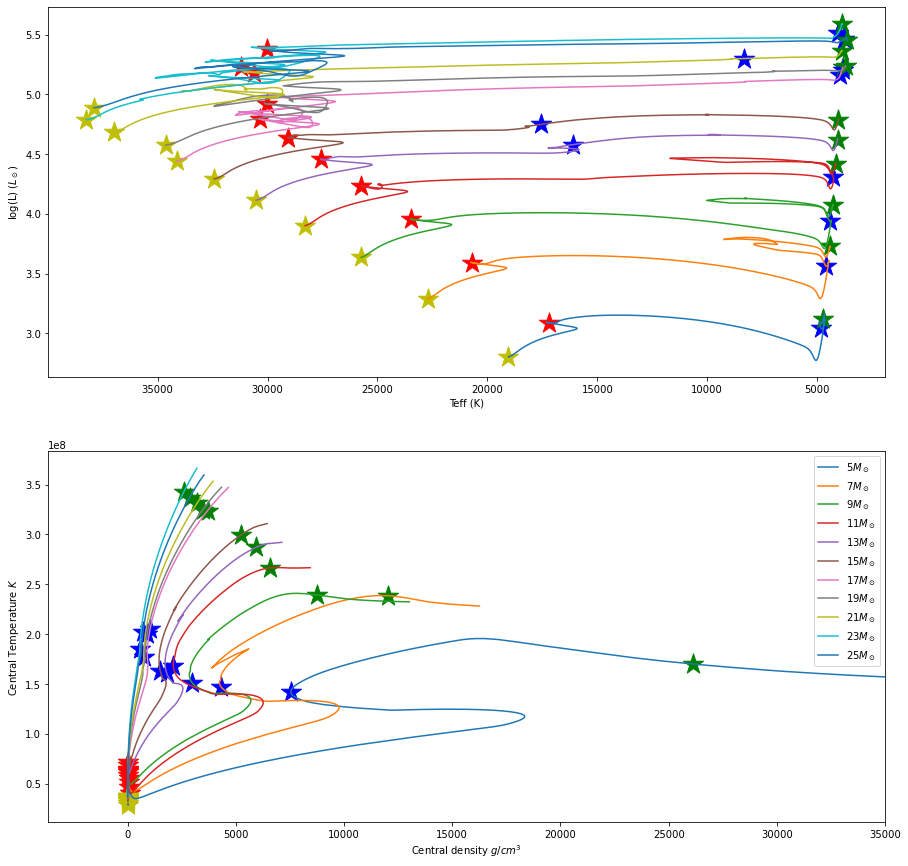

In [15]:
#My star mass was M = 23Msol and my metalicity was Z = 0.005
#depletion when central mass fraction is below e-4  use central mass fractions 
# Note that 19 , 25 could not converge past a point therefore thier evolution stops at he 
M_star = [5,7,9,11,13,15,17,19,21,23,25]
Z = 0.005

pwd = '/home/lewis/Documents/Honours/Stellar/Assignment_2/Models/constant_Z/'

fig, ax = plt.subplots(2, figsize=(15, 15))
ax[0].set_ylabel('log(L) $(L_\odot)$')
ax[0].set_xlabel('Teff (K)')
ax[1].set_ylabel('Central Temperature $K$')
ax[1].set_xlabel('Central density $g/cm^3$')



for i in M_star: 
    data = mr.MesaData(pwd + str(i) + 'M_005Z/history.data')
    center_T = data.center_T
    center_Rho = data.center_Rho
    l = data.luminosity
    Teff = data.effective_T
    
    idx_zams = find_nearest(data.total_mass_h1, data.total_mass_h1[0]*0.99)
    idx_h_deplete = find_nearest(data.center_h1, 1e-4)
    #condition for He ignition AFTER H depletion (was considering when C_core mass is > 0)
    idx_he_ignite =idx_h_deplete + find_nearest(data.total_mass_he4[idx_h_deplete:], data.total_mass_he4[idx_h_deplete]*0.99)
    idx_he_deplete = find_nearest(data.center_he4, 1e-4)
    print(len(data.center_he4))
    print(idx_zams,idx_h_deplete ,idx_he_ignite,idx_he_deplete)
    #plot the points of interest
    ax[0].scatter(Teff[idx_zams],np.log10(l[idx_zams]),marker = "*", c = 'y',zorder=1, s = 4.5e2)
    ax[1].scatter(center_Rho[idx_zams],center_T[idx_zams],marker = "*", c = 'y',zorder=1, s = 4.5e2)
    
    ax[0].scatter(Teff[idx_he_ignite],np.log10(l[idx_he_ignite]),marker = "*", c = 'b',zorder=1, s = 4.5e2)
    ax[1].scatter(center_Rho[idx_he_ignite],center_T[idx_he_ignite],marker = "*", c = 'b',zorder=1, s = 4.5e2)
    
    ax[0].scatter(Teff[idx_h_deplete],np.log10(l[idx_h_deplete]),marker = "*", c = 'r',zorder=1, s = 4.5e2)
    ax[1].scatter(center_Rho[idx_h_deplete],center_T[idx_h_deplete],marker = "*", c = 'r',zorder=1, s = 4.5e2)
    
    ax[0].scatter(Teff[idx_he_deplete],np.log10(l[idx_he_deplete]),marker = "*", c = 'g',zorder=1, s = 4.5e2)
    ax[1].scatter(center_Rho[idx_he_deplete],center_T[idx_he_deplete],marker = "*", c = 'g',zorder=1, s = 4.5e2)
    
    #plot the curves stating from zams 
    ax[0].plot(Teff[idx_zams:], np.log10(l[idx_zams:]), label = str(i) + '$M_\odot$')
    ax[0].invert_xaxis() #invert xaxis for traditional HR diagram 
    ax[1].plot(center_Rho[idx_zams:],center_T[idx_zams:], label = str(i) + '$M_\odot$')
plt.legend()
ax[1].set_xlim(right  = 35000)
plt.show()
#Below is HR plot and T_C vs rho_c for each mass at z = 0.005    

Discussion of the plot features: 

The HR plot:

First things first, Yellow stars represent the start of central H burning, the red stars at the end of central H burning. 
The blue stars represent the start of core He burning and the green stars at the end of core He burning. 

The first thing to mention would be the positioning of the the yellow stars. They follow a sort of line that would be analugous to the zero aged main sequence line that we commonly observe on the traditional HR diagram. 

As the stars burn H in the core they slowly expand and become more luminous this leads to a cooler surface temperature as can be seen. Once the star begins to run low on H the star cannot generate enough energy to maintain the expanded layers and the stars envelope collapse a little bit, causeing the surface temperature to increase while becomeing more luminous and quickly burn the remaining H. Bringing an end to core H burning phase. The stars will then burn H in a shell around an inert He core, this will cause the star to cross the hertzsprung gap. In doing so the stars enelope expands, and thus becomes a red giant while simultaneously the He core contracts until it reaches a temperature high enough to ingite helium (marked buy the blue stars). 
At this point the stars are in Hydrostatic equilibrium for the second longest phase in its life. The stars do not change much at this point (expands slightly and becomes a little more luminous) until it has exhausted central He. Some interesting features is that some stars begin to burn He while the star is crossing the Hertzsprung gap, and some stars exhibit blue looping. 

The T vs Rho plot:

Lets first point out the obvious, for each model the central density was more or less constant during central H burning and central temperature rises slowly. (this is why the star expands slightly because higher T means more energy production).

Analizing the 5$M_\odot$ curve (since it is the most extreme) once the hydrogen is depleted the core cools down slightly and subsequently cannot maintin the pressure and thus contracts causeing the temperature and density to rise! This occurs until H shell burning kicks it which then contributes to puffing up the star causing that loop back towards lower densities. The temperature however continues to rise until its hot enough for He burning and as it sythesises heavier elements the core's density will increase along with the temperature. As He runs low in the center the reaction rate reduces which causes the 'bump' in temperature since energy is been produced at a lower rate untill He is finally depleted and the star can continue to evolve. 

The reason as to why only the low mass curves have this shape may not be instantly obvious, but is due to the fact that the transition phases happen seemlessly. I.e the central conditions in massive stars are extreme enough so that the core does not need to contract significantly to ignite the helium. 

Although it is sublte it must be noted the curves for 19, and 25 solar masses were run with slightly different metalicities and thereofre should be considered as outliers in the trend! This measure was taken to overcome the issue of failed convergence during a run (and therefore premeturely terminate).  

part b)

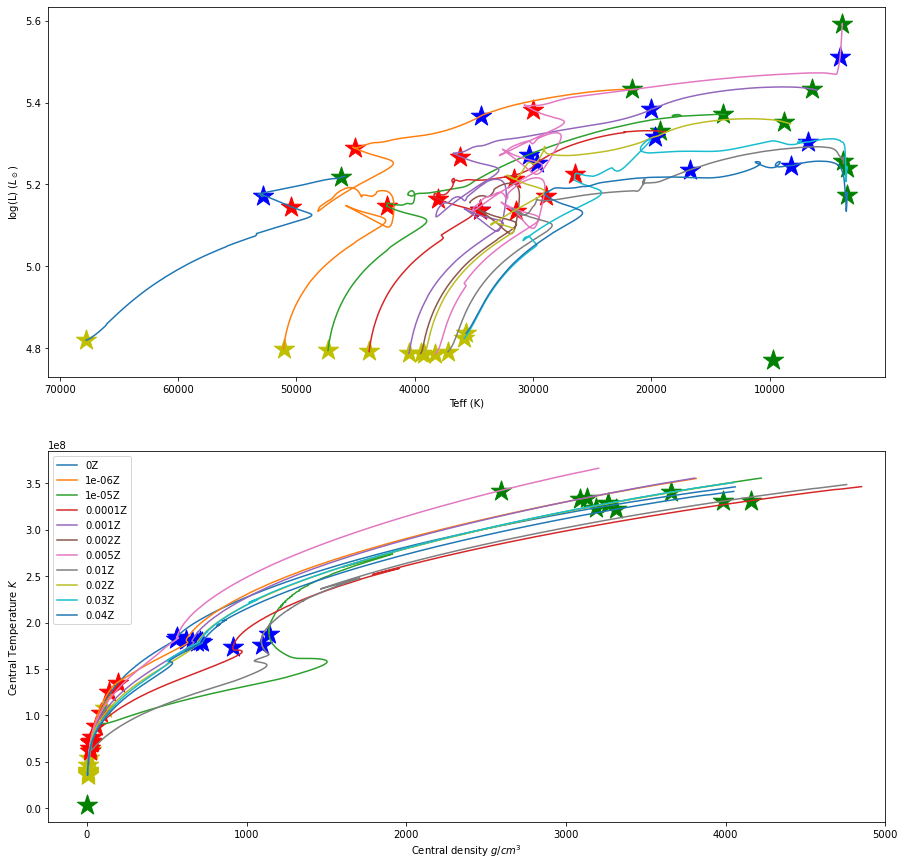

In [25]:
M_star = 23
Z = [0,1e-6,1e-5,1e-4,1e-3,0.002,0.005,0.01,0.02,0.03,0.04]
Z_dir = ['0','6','5','4','3','002','005','01','02','03','04']
pwd = '/home/lewis/Documents/Honours/Stellar/Assignment_2/Models/constant_M/'
#002 IS SHIT AND SO IS 04

fig, ax = plt.subplots(2, figsize=(15, 15))
ax[0].set_ylabel('log(L) $(L_\odot)$')
ax[0].set_xlabel('Teff (K)')
ax[1].set_ylabel('Central Temperature $K$')
ax[1].set_xlabel('Central density $g/cm^3$')

for z,i in enumerate(Z_dir): 
    data = mr.MesaData(pwd + '23M_' + i + 'Z/history.data')
    center_T = data.center_T
    center_Rho = data.center_Rho
    l = data.luminosity
    Teff = data.effective_T
    
    idx_zams = find_nearest(data.total_mass_h1, data.total_mass_h1[0]*0.99)
    idx_h_deplete = find_nearest(data.center_h1, 1e-4)
    #condition for He ignition AFTER H depletion (was considering when C_core mass is > 0)
    idx_he_ignite =idx_h_deplete + find_nearest(data.total_mass_he4[idx_h_deplete:], data.total_mass_he4[idx_h_deplete]*0.99)
    idx_he_deplete = find_nearest(data.center_he4, 1e-4)
    #plot the points of interest
    ax[0].scatter(Teff[idx_zams],np.log10(l[idx_zams]),marker = "*", c = 'y',zorder=1, s = 4.5e2)
    ax[1].scatter(center_Rho[idx_zams],center_T[idx_zams],marker = "*", c = 'y',zorder=1, s = 4.5e2)
    
    ax[0].scatter(Teff[idx_he_ignite],np.log10(l[idx_he_ignite]),marker = "*", c = 'b',zorder=1, s = 4.5e2)
    ax[1].scatter(center_Rho[idx_he_ignite],center_T[idx_he_ignite],marker = "*", c = 'b',zorder=1, s = 4.5e2)
    
    ax[0].scatter(Teff[idx_h_deplete],np.log10(l[idx_h_deplete]),marker = "*", c = 'r',zorder=1, s = 4.5e2)
    ax[1].scatter(center_Rho[idx_h_deplete],center_T[idx_h_deplete],marker = "*", c = 'r',zorder=1, s = 4.5e2)
    
    ax[0].scatter(Teff[idx_he_deplete],np.log10(l[idx_he_deplete]),marker = "*", c = 'g',zorder=1, s = 4.5e2)
    ax[1].scatter(center_Rho[idx_he_deplete],center_T[idx_he_deplete],marker = "*", c = 'g',zorder=1, s = 4.5e2)
    
    #plot the curves stating from zams 
    ax[0].plot(Teff[idx_zams:], np.log10(l[idx_zams:]), label = str(Z[z]) + 'Z')
    ax[0].invert_xaxis() #invert xaxis for traditional HR diagram 
    ax[1].plot(center_Rho[idx_zams:],center_T[idx_zams:], label = str(Z[z]) + 'Z')
plt.legend()
ax[1].set_xlim(right  = 5000)
plt.show()

Discussion of the plot features: 

The main thing to note in our disscusion is that we are varying metalicity and we should therefore be thinking about how metalicity effects the stars properties. Most importantly it effects the opacity of the stars. Stars with low metalicity are more transparent compared to higher metalicitiy stars which are more opaque. 
(also stars with 0 metalicity cannot burn H via the CNO cycle which will be the main sorce of energy production in my 23Msol stars) 

The HR plot:

Interestingly we notice that the models begin H burning at a more or less constant luminocity (energy product)but vastly varying surface temperature. This is because the lower metalicity stars are more transparent, hence energy can radiate from the surface more easily and is not trapped under the layers hence the stars can be more compact. Since luminosity is proportional to surface area and temperature a star with constant luminosity and lower surface area must have a higher surface temperature. 

We notice the general trend of mainsequence evolution as explained previously is pressent in the curves. At the end of H burning the stars expand to become red giants and we notice that the lower metalicity stars do not expand as significantly as the higher metalicity stars (refer to the surface temperature)

I dont think I can explain the 'chaos' as it crosses the Hz gap and I will attribute that to the short commings of MESA and its shortcommings when moddeling extreme parameter ranges without varying other parameters in the inlist! Note the outlier green star in the data caused by z = 0.002! 


The T vs Rho plot:
Once again the central density of the stars are more or less constant while the temperature increases slightly durning  H burning. The majority of the curves follow a simmilar trajectory that is expected of a large star, where the transition of the burning phases happen seemlessly with a bump in temperature when helium is ignited. However 3 of the curves (Z = 1e-5, 1e-4 and 0.01) seem to exhibit the looping features of low mass stars that was explained in the previous section. I cannot think of a reason that would justify this since it doesnt follow any pattern in the metalicity!
However the curves do end up evolving toward the upper right corner at the end of He burning, where it should be obvious that a CNO core has been developing and continues with its carbon burning phase.  

